# SVR = Support Vector Regression

First we will load the previous Linear Regression Model here

In [218]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
import matplotlib.pyplot as plt

In [190]:
# load the data and cleaning process with categories convert and all
csv_path = "insurance.csv"
df = pd.read_csv(csv_path)

# Using Dictionary Mapping for the smoker and sex columns
df['smoker'] = df['smoker'].map({"yes":1, "no":0})
df['sex'] = df['sex'].map({"male":1, "female":0})

# importing OneHotEncoder for coverting the categorical values for regions.
from sklearn.preprocessing import OneHotEncoder
variables = ['region']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encodded= encoder.fit_transform(df[variables]).astype(int)
df= pd.concat([df, one_hot_encodded], axis=1).drop(columns=variables)

In [191]:
# Linear regression model.

# First we do split between X and y.
X = df.drop("charges", axis=1)

# our target variable is y
y = df["charges"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [192]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))
print('R-Squared:', r2_score(y_test, predictions))

Mean Absolute Error: 4145.4505556275935
Mean Squared Error: 33780509.57479168
Root Mean Squared Error: 5812.100272258874
R-Squared: 0.7696118054369008


# Scale the y-variable with StandardScaler 
https://spotintelligence.com/2024/05/08/support-vector-regression-svr/

Feature Scaling basically helps to normalizes the data within a particular range. 

In [193]:
# Feature scaling is essential for SVR!
sc_X = StandardScaler()
sc_y = StandardScaler()

In [194]:
X = df.drop("charges", axis=1)
# our target variable is y
y = df["charges"]

In [195]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [196]:
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = sc_y.fit_transform(y_test.values.reshape(-1, 1)).ravel()

# Fitting SVR to the dataset

Using StandardScaler, Got some decent model with R-Squared Score of 77%

In [197]:
# connect standard scaler for X-values
model = make_pipeline(StandardScaler(), svm.SVR())
model.fit(X_train_scaled, y_train_scaled)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [198]:
predictions_scaled = model.predict(X_test_scaled)

In [199]:
# inverse transform predictions and true y as we predicted the model on scaled values
predictions = sc_y.inverse_transform(predictions_scaled.reshape(-1, 1))

In [200]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

# otherwise metrics as usual, but add this:
# convert RMSE to original value range
print("\nRMSE in original value range:")
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)) * (max_y - min_y), 2))

MAE
2151.93 $

MSE
21018755.94 $^2

RMSE:
4584.62 $

R-squared:
0.86

RMSE in original value range:
287219919.34


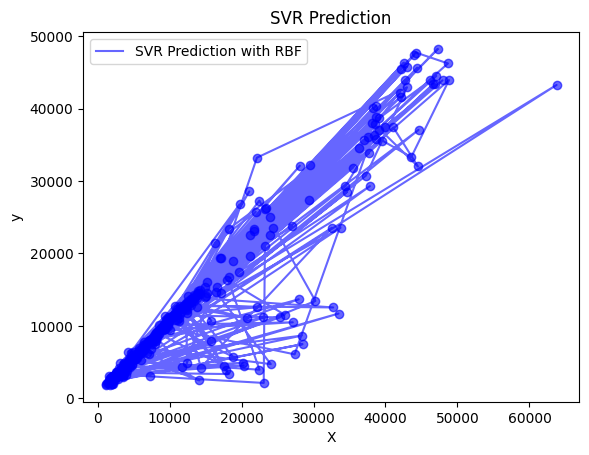

In [201]:
# Visualizing the SVR results
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot(y_test, predictions, color='blue', alpha=0.6, label='SVR Prediction with RBF')
plt.title('SVR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Using other ways how to optimize the SVR-model
https://www.geeksforgeeks.org/rbf-svm-parameters-in-scikit-learn/

Here using Radial Basis Function kernel with regularization parameter, gamma and epsilon.

In [202]:
# Initializing and training the SVR model
model_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model_rbf.fit(X_train_scaled, y_train_scaled)

# Predicting the test set results
predictions_scaled = model_rbf.predict(sc_X.transform(X_test))
predictions = sc_y.inverse_transform(predictions_scaled.reshape(-1, 1))

In [203]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

# otherwise metrics as usual, but add this:
# convert RMSE to original value range
print("\nRMSE in original value range:")
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)) * (max_y - min_y), 2))

MAE
2698.12 $

MSE
25397997.06 $^2

RMSE:
5039.64 $

R-squared:
0.83

RMSE in original value range:
315726319.15


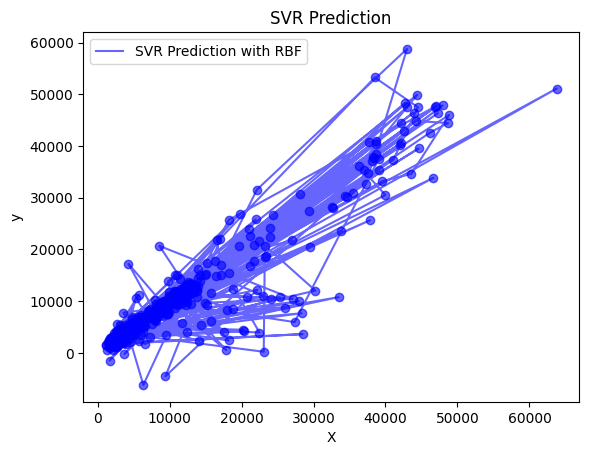

In [204]:
# Visualizing the SVR results
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot(y_test, predictions, color='blue', alpha=0.6, label='SVR Prediction with RBF')
plt.title('SVR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Personal Analysis

### Model Performance Comparison

| Model Version                          | MAE ($) | MSE ($²)       | RMSE ($) | R² Score | RMSE (Original Range)|
|----------------------------------------|---------|----------------|----------|----------|----------------------|
| Linear Regression                      | 4145.45 | 33780509.57    | 5812.10  | 0.76     | 287219919.34         |
| SVR (StandardScaler default)           | 2151.93 | 21018755.94    | 4584.62  | 0.86     | 287219919.34         |
| SVR (RBF, C=100, γ=0.1, ε=0.1)         | 2698.12 | 25397997.06    | 5039.64  | 0.83     | 315726319.15         |


### Personal Analysis: SVR vs Linear Regression

After training and evaluating all models here I think, the SVR with default StandardScaler settings outperformed both Linear Regression and the tuned SVR with RBF kernel (C=100, gamma=0.1, epsiolon=0.1) in every metrics here:

- It achieved the lowest MAE 2151.93 and lowest RMSE 4584.62, along with the highest R^2 score (0.86), indicating better accuracy and fit.
- The tuned SVR model (RBF kernel) slightly underperformed compared to the default SVR — likely because the chosen hyperparameters weren’t optimal, or maybe the default ones used were already not well-suited.


### Where Could These Models Be Useful?

https://stats.stackexchange.com/questions/633091/support-vector-regression-vs-linear-regression

- Linear Regression: best for simple predictions where the relationship is nearly linear.
- SVR: suitable for prediction cases with non-linear patterns or outliers.

### Ideas for Optimization
https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ <br>
https://scikit-learn.org/stable/modules/cross_validation.html
- Use GridSearchCV to systematically find the best values for C, gamma, and epsilon in SVR.
- Experiment with other kernels like poly or sigmoid.

# GridSearchCV for SVR Optimization

Using Different Kernels Didn't help will try with RBF only as it performed earlier with some default parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [270]:
pipeline = make_pipeline(StandardScaler(), SVR())

In [272]:
# defining parameter range 
param_grid = {'svr__C': [1,10,100,1000],'svr__kernel':['rbf','linear', 'sigmoid'],'svr__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]} 
  
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END svr__C=1, svr__gamma=0.1, svr__kernel=rbf;, score=-0.109 total time=   0.0s
[CV 2/5] END svr__C=1, svr__gamma=0.1, svr__kernel=rbf;, score=-0.145 total time=   0.0s
[CV 3/5] END svr__C=1, svr__gamma=0.1, svr__kernel=rbf;, score=-0.127 total time=   0.0s
[CV 4/5] END svr__C=1, svr__gamma=0.1, svr__kernel=rbf;, score=-0.090 total time=   0.0s
[CV 5/5] END svr__C=1, svr__gamma=0.1, svr__kernel=rbf;, score=-0.044 total time=   0.0s
[CV 1/5] END svr__C=1, svr__gamma=0.1, svr__kernel=linear;, score=-0.052 total time=   0.0s
[CV 2/5] END svr__C=1, svr__gamma=0.1, svr__kernel=linear;, score=-0.090 total time=   0.0s
[CV 3/5] END svr__C=1, svr__gamma=0.1, svr__kernel=linear;, score=-0.061 total time=   0.0s
[CV 4/5] END svr__C=1, svr__gamma=0.1, svr__kernel=linear;, score=-0.037 total time=   0.0s
[CV 5/5] END svr__C=1, svr__gamma=0.1, svr__kernel=linear;, score=0.011 total time=   0.0s
[CV 1/5] END svr__C=1, svr__gamma

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [1, 10, 100, 1000],
                         'svr__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                        0.9],
                         'svr__kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=3)

In [273]:
print(grid.best_params_)
print(grid.best_score_)

{'svr__C': 1000, 'svr__gamma': 0.1, 'svr__kernel': 'linear'}
0.6563452532281854


In [274]:
# Initializing and training the SVR model
model_gridCV_best = SVR(kernel='linear', C=1000, gamma=0.1)
model_gridCV_best.fit(X_train_scaled, y_train_scaled)

# Predicting the test set results
predictions_scaled = model_gridCV_best.predict(sc_X.transform(X_test))
prediction= sc_y.inverse_transform(predictions_scaled.reshape(-1, 1))

In [276]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, prediction), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, prediction), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, prediction)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, prediction), 2))

# otherwise metrics as usual, but add this:
# convert RMSE to original value range
print("\nRMSE in original value range:")
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)) * (max_y - min_y), 2))

MAE
3254.85 $

MSE
39783156.24 $^2

RMSE:
6307.39 $

R-squared:
0.73

RMSE in original value range:
315726319.15


In [277]:
# rbf kernel only

# defining parameter range 
param_grid = { 'svr__C': [10, 100, 500], 'svr__gamma': [0.05, 0.1, 0.2], 'svr__epsilon': [0.01, 0.1, 0.5], 'svr__kernel': ['rbf'] }  
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.05, svr__kernel=rbf;, score=-0.087 total time=   0.0s
[CV 2/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.05, svr__kernel=rbf;, score=-0.124 total time=   0.0s
[CV 3/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.05, svr__kernel=rbf;, score=-0.099 total time=   0.0s
[CV 4/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.05, svr__kernel=rbf;, score=-0.069 total time=   0.0s
[CV 5/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.05, svr__kernel=rbf;, score=-0.022 total time=   0.0s
[CV 1/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.1, svr__kernel=rbf;, score=-0.089 total time=   0.0s
[CV 2/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.1, svr__kernel=rbf;, score=-0.126 total time=   0.0s
[CV 3/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.1, svr__kernel=rbf;, score=-0.101 total time=   0.0s
[CV 4/5] END svr__C=10, svr__epsilon=0.01, svr__gamma=0.1, sv

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [10, 100, 500],
                         'svr__epsilon': [0.01, 0.1, 0.5],
                         'svr__gamma': [0.05, 0.1, 0.2],
                         'svr__kernel': ['rbf']},
             verbose=3)

In [278]:
print(grid.best_params_)
print(grid.best_score_)

{'svr__C': 500, 'svr__epsilon': 0.01, 'svr__gamma': 0.05, 'svr__kernel': 'rbf'}
0.530043272547043


In [279]:
# Initializing and training the SVR model
model_gridCV_best = SVR(kernel='rbf', C=500, gamma=0.01,epsilon=0.01 )
model_gridCV_best.fit(X_train_scaled, y_train_scaled)

# Predicting the test set results
predictions_scaled = model_gridCV_best.predict(sc_X.transform(X_test))
prediction= sc_y.inverse_transform(predictions_scaled.reshape(-1, 1))

In [280]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, prediction), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, prediction), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, prediction)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, prediction), 2))

# otherwise metrics as usual, but add this:
# convert RMSE to original value range
print("\nRMSE in original value range:")
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)) * (max_y - min_y), 2))

MAE
1977.94 $

MSE
22621623.39 $^2

RMSE:
4756.22 $

R-squared:
0.85

RMSE in original value range:
315726319.15


# Conclusion
This version outperforms all earlier SVR attempts, using the manual RBF model with GridSearchCV to find best parameters.